### Fix problems with dataset, augment images with basic techniques and split into training, validation and testing datasets. 

Dataset Link: https://www.kaggle.com/datasets/faizalkarim/flood-area-segmentation

Total Images: 290

Total Masks: 290

### Importing Dependencies

In [120]:
import glob
import os
import matplotlib.pyplot as plt
import shutil
import imageio.v3 as imio
import cv2
import numpy as np
import random

### Fix Dataset

In [2]:
images = sorted(glob.glob('floods/Image/*'))

! rm -rf floods/Image_fixed
os.mkdir('floods/Image_fixed/')

In [3]:
for file in images:
    x = ! file {file}
    x = x[0].split(' ')[1]
    fname = file.split('.')[0]

    if x == 'GIF':
        image = imio.imread(file)
        fname = 'floods/Image_fixed/' + file.split('/')[-1].split('.')[0] + '.jpg'
        imio.imwrite(fname, image)
    
    else:
        image = cv2.imread(file)
        fname = 'floods/Image_fixed/' + file.split('/')[-1].split('.')[0] + '.jpg'
        cv2.imwrite(fname, image)

### Visualize

In [4]:
images = sorted(glob.glob('floods/Image_fixed/*.jpg'))
masks = sorted(glob.glob('floods/Mask/*.png'))

print(len(images), len(masks))

290 290


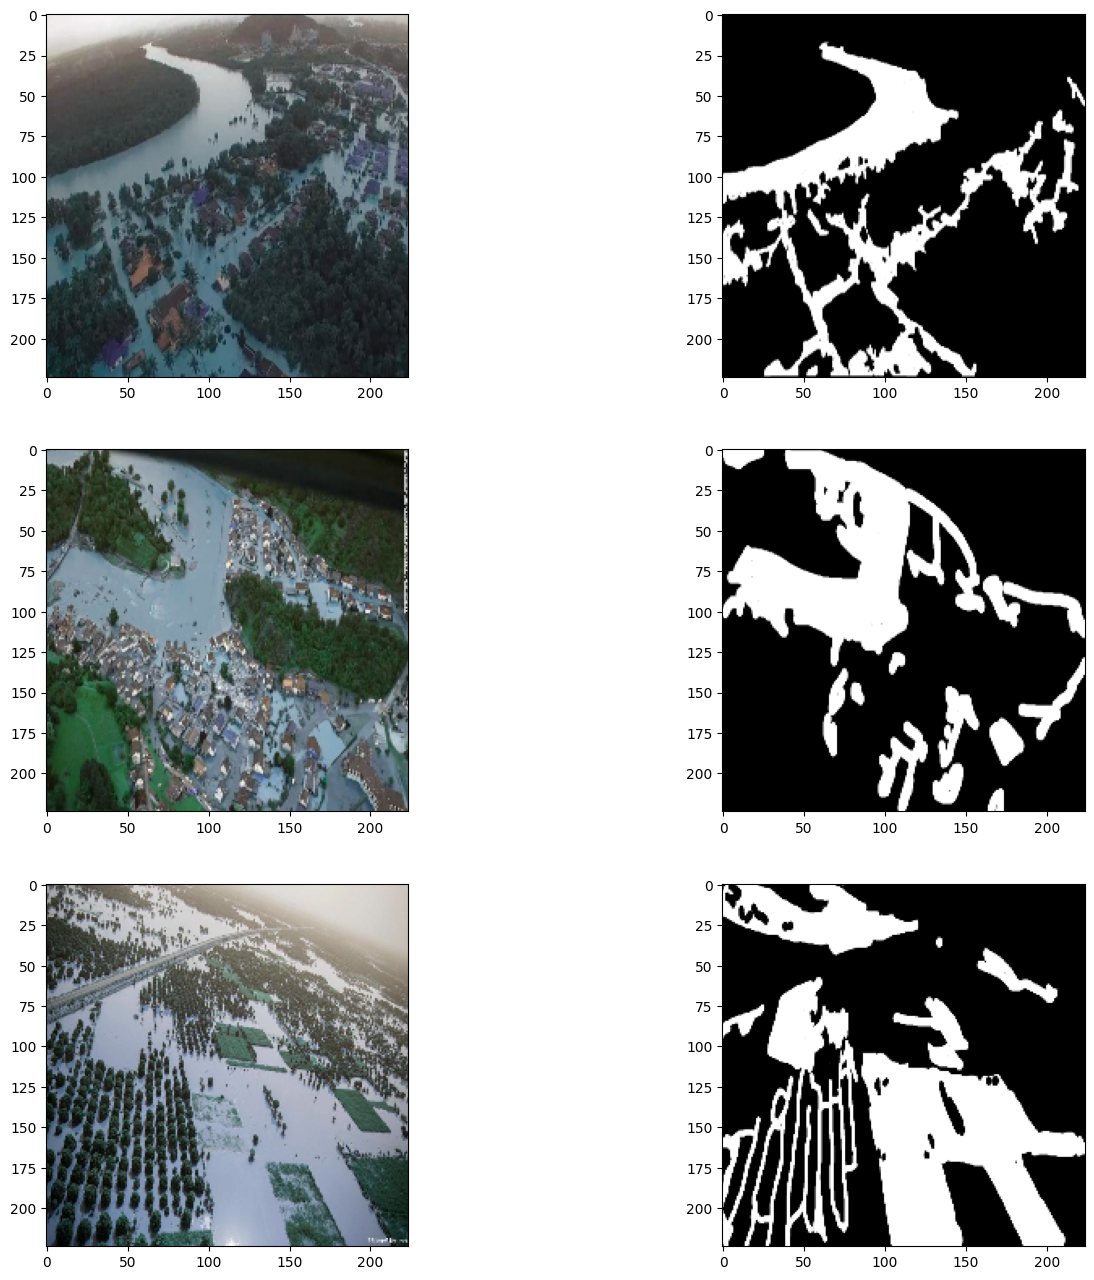

In [28]:
import random

plt.figure(figsize=(16, 16))
for i in range(3):
    j = i*2
    x = random.randint(0, len(images) - 1)

    img = cv2.imread(images[x])
    msk = cv2.imread(masks[x])
    
    img = cv2.resize(img, (224, 224))
    msk = cv2.resize(msk, (224, 224))

    plt.subplot(3, 2, j+1)
    plt.imshow(img)
    plt.subplot(3, 2, j+2)
    plt.imshow(msk)

### Augment

In [143]:
def plot(image, mask):
    plt.figure(figsize=(16, 16))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.imshow(mask)

In [148]:
def horizontal_flip(image, mask):
    image = cv2.flip(image, 1)
    mask = cv2.flip(mask, 1)
    
    return image, mask

def vertical_flip(image, mask):
    image = cv2.flip(image, 0)
    mask = cv2.flip(mask, 0)
    
    return image, mask

def rotate_pos(image, mask):
    image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    mask = cv2.rotate(mask, cv2.ROTATE_90_CLOCKWISE)
    
    return image, mask

def rotate_neg(image, mask):
    image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    mask = cv2.rotate(mask, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    return image, mask

def noise(image, mask):
    mean = 10
    stddev = random.randint(25, 200)
    noise = np.zeros(image.shape, np.uint8)
    cv2.randn(noise, mean, stddev)

    # Add noise to image
    noisy_img = cv2.add(image, noise)
    return noisy_img, mask

In [168]:
augment = [ horizontal_flip, vertical_flip, rotate_pos, rotate_neg, noise ]
!rm -rf floods_augment
!mkdir floods_augment
!mkdir floods_augment/images
!mkdir floods_augment/masks

img_path = 'floods_augment/images/'
msk_path = 'floods_augment/masks/'

In [169]:
for i in range(len(images)):
    img = cv2.imread(images[i])
    msk = cv2.imread(masks[i])
    
    img = cv2.resize(img, (224, 224))
    msk = cv2.resize(msk, (224, 224))
    
    im_name = images[i].split('/')[-1].split('.')[0]

    cv2.imwrite(img_path + im_name + '__0.jpg', img)
    cv2.imwrite(msk_path + im_name + '__0.png', msk)

    for i, x in enumerate(augment):
        a, b = x(img, msk)
        cv2.imwrite(img_path + im_name + f'__{i+1}.jpg', a)
        cv2.imwrite(msk_path + im_name + f'__{i+1}.png', b)

### Create Train, Validation and Test Datasets

In [183]:
images = sorted(glob.glob('floods_augment/images/*'))
masks = sorted(glob.glob('floods_augment/masks/*'))

!rm -rf floods_dataset
!mkdir floods_dataset/
!mkdir floods_dataset/train
!mkdir floods_dataset/train/images
!mkdir floods_dataset/train/masks
!mkdir floods_dataset/validation
!mkdir floods_dataset/validation/images
!mkdir floods_dataset/validation/masks
!mkdir floods_dataset/test
!mkdir floods_dataset/test/images
!mkdir floods_dataset/test/masks

In [184]:
train = 200 * 6
val = 230 * 6
test = 290 * 6

for i in range(0, train):
    print(images[i], masks[i])
    !cp {images[i]} floods_dataset/train/images
    !cp {masks[i]} floods_dataset/train/masks
    
for i in range(train, val):
    print(images[i], masks[i])
    !cp {images[i]} floods_dataset/validation/images
    !cp {masks[i]} floods_dataset/validation/masks

for i in range(val, test):
    print(images[i], masks[i])
    !cp {images[i]} floods_dataset/test/images
    !cp {masks[i]} floods_dataset/test/masks

floods_augment/images/0__0.jpg floods_augment/masks/0__0.png
floods_augment/images/0__1.jpg floods_augment/masks/0__1.png
floods_augment/images/0__2.jpg floods_augment/masks/0__2.png
floods_augment/images/0__3.jpg floods_augment/masks/0__3.png
floods_augment/images/0__4.jpg floods_augment/masks/0__4.png
floods_augment/images/0__5.jpg floods_augment/masks/0__5.png
floods_augment/images/1000__0.jpg floods_augment/masks/1000__0.png
floods_augment/images/1000__1.jpg floods_augment/masks/1000__1.png
floods_augment/images/1000__2.jpg floods_augment/masks/1000__2.png
floods_augment/images/1000__3.jpg floods_augment/masks/1000__3.png
floods_augment/images/1000__4.jpg floods_augment/masks/1000__4.png
floods_augment/images/1000__5.jpg floods_augment/masks/1000__5.png
floods_augment/images/1001__0.jpg floods_augment/masks/1001__0.png
floods_augment/images/1001__1.jpg floods_augment/masks/1001__1.png
floods_augment/images/1001__2.jpg floods_augment/masks/1001__2.png
floods_augment/images/1001__3.j